<a href="https://colab.research.google.com/github/anupkumar888/Python_Programming/blob/main/KC_HOUSE_REGRESSION_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
df=pd.read_csv("//content/drive/MyDrive/PYTHON PROGRAMMING/Colab Notebooks/Machine Learning/ML REGRESSI0N ASSIGNMENT/kc_house_data_NaN_rj3w4.csv")
print(df.head(10))

   Unnamed: 0          id             date      price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000   221900.0       3.0       1.00   
1           1  6414100192  20141209T000000   538000.0       3.0       2.25   
2           2  5631500400  20150225T000000   180000.0       2.0       1.00   
3           3  2487200875  20141209T000000   604000.0       4.0       3.00   
4           4  1954400510  20150218T000000   510000.0       3.0       2.00   
5           5  7237550310  20140512T000000  1225000.0       4.0       4.50   
6           6  1321400060  20140627T000000   257500.0       3.0       2.25   
7           7  2008000270  20150115T000000   291850.0       3.0       1.50   
8           8  2414600126  20150415T000000   229500.0       3.0       1.00   
9           9  3793500160  20150312T000000   323000.0       3.0       2.50   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180 

In [14]:
#Drop the "Unnamed: 0" column in the DataFrame.
df.drop(['Unnamed: 0'], axis=1,inplace=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21600 non-null  float64
 4   bathrooms      21603 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [16]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [18]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

In [19]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
df.isnull().sum()

id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [25]:
df["bedrooms"].isnull().sum()

13

In [26]:
df["bedrooms"]

0        3.0
1        3.0
2        2.0
3        4.0
4        3.0
        ... 
21608    3.0
21609    4.0
21610    2.0
21611    3.0
21612    2.0
Name: bedrooms, Length: 21613, dtype: float64

In [28]:
import numpy as np
df.replace("?",np.nan,inplace=True)

In [31]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [35]:
missing_data=df.isnull()

missing_data.head(30)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
missing_data.sum()

id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [38]:
df["bedrooms"].dtype

dtype('float64')

In [42]:
avg_bedrooms=df["bedrooms"].astype("float").mean()
print("Average Bedroms:\t",avg_bedrooms)

Average Bedroms:	 3.37287037037037


In [43]:
df["bedrooms"].replace(np.nan,avg_bedrooms,inplace=True)

In [44]:
df["bedrooms"].

0        3.0
1        3.0
2        2.0
3        4.0
4        3.0
        ... 
21608    3.0
21609    4.0
21610    2.0
21611    3.0
21612    2.0
Name: bedrooms, Length: 21613, dtype: float64

In [46]:
df_bedrooms=df['bedrooms'].isnull().sum()
df_bedrooms

0

In [47]:
missing_data.sum()

id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [48]:
df["bathrooms"]

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21608    2.50
21609    2.50
21610    0.75
21611    2.50
21612    0.75
Name: bathrooms, Length: 21613, dtype: float64

In [49]:
df["bathrooms"].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [50]:
avg_bathrooms=df["bathrooms"].astype("float").mean(axis=0)
print("Average of Bathrooms:\t",avg_bathrooms)

Average of Bathrooms:	 2.1157362403369904


In [51]:
df["bathrooms"].replace(np.nan,avg_bathrooms,inplace=True)

In [52]:
df_bathrooms=df["bathrooms"].isnull()
df_bathrooms.sum()

0

In [53]:
missing_df=df.isnull()

missing_df.sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [54]:
df.shape

(21613, 21)

## **All missing values are handled**



In [55]:
df.dtypes


id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [57]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


## Normalization

In [60]:
df["price"].head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [62]:
#When there is 10 percentage discount for early booking.

df["price"]=df["price"]*0.9
df["price"].head()

0    199710.0
1    484200.0
2    162000.0
3    543600.0
4    459000.0
Name: price, dtype: float64

## **REGRESSION MODEL FITTING**

In [64]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

We will find the correlations between the differen parameter in the columns of the above data frame.

In [66]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [68]:
df1=df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','yr_built','sqft_living15','sqft_lot15','price']]
df1

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price
0,3.0,1.00,1180,5650,1.0,1180,0,1955,1340,5650,199710.0
1,3.0,2.25,2570,7242,2.0,2170,400,1951,1690,7639,484200.0
2,2.0,1.00,770,10000,1.0,770,0,1933,2720,8062,162000.0
3,4.0,3.00,1960,5000,1.0,1050,910,1965,1360,5000,543600.0
4,3.0,2.00,1680,8080,1.0,1680,0,1987,1800,7503,459000.0
...,...,...,...,...,...,...,...,...,...,...,...
21608,3.0,2.50,1530,1131,3.0,1530,0,2009,1530,1509,324000.0
21609,4.0,2.50,2310,5813,2.0,2310,0,2014,1830,7200,360000.0
21610,2.0,0.75,1020,1350,2.0,1020,0,2009,1020,2007,361890.9
21611,3.0,2.50,1600,2388,2.0,1600,0,2004,1410,1287,360000.0


In [69]:
df1['price'].corr(df1['bedrooms'])

0.308796802220026

In [70]:
df1['price'].corr(df1['bathrooms'])

0.5257375111242716

In [71]:
df1['price'].corr(df1['sqft_living'])

0.7020350546118003

In [72]:
df1['price'].corr(df1['sqft_lot'])

0.08966086058710013

In [74]:
df1['price'].corr(df1['floors'])

0.25679388755071847

In [75]:
df1['price'].corr(df1['sqft_above'])

0.6055672983560784

In [76]:
df1['price'].corr(df1['sqft_basement'])

0.3238160207119833

In [77]:
df1['price'].corr(df1['yr_built'])

0.05401153149479272

In [78]:
df1['price'].corr(df1['sqft_living15'])

0.5853789035795683

In [79]:
df1['price'].corr(df1['sqft_lot15'])

0.08244715251948599

## ***Conclusions:***

From the above,it is concluded that price is highly correlated to 'bedrooms',   'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'sqft_basement' and  'sqft_living15'

But there is great correlation between "price",   'sqft_living' and 'sqft_living15'

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


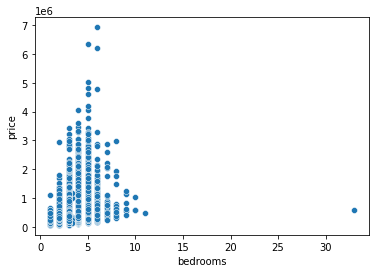

In [80]:
import seaborn as sns 
sns.scatterplot(df["bedrooms"],df["price"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


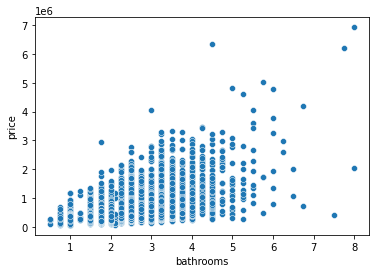

In [81]:
sns.scatterplot(df["bathrooms"],df["price"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


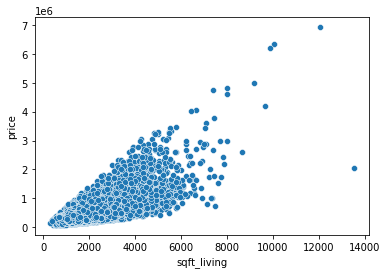

In [82]:
sns.scatterplot(df["sqft_living"],df["price"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


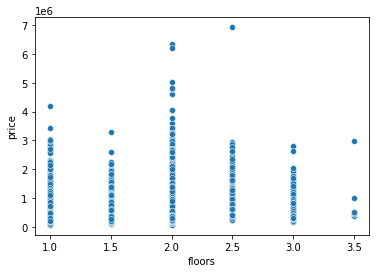

In [83]:
sns.scatterplot(df["floors"],df["price"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


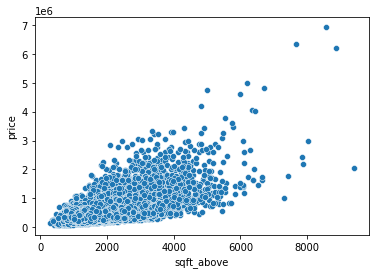

In [84]:
sns.scatterplot(df["sqft_above"],df["price"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


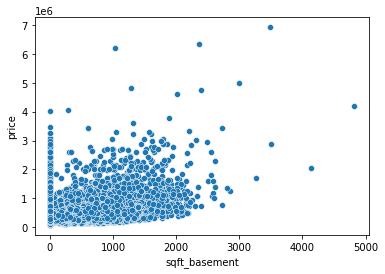

In [85]:
sns.scatterplot(df["sqft_basement"],df["price"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


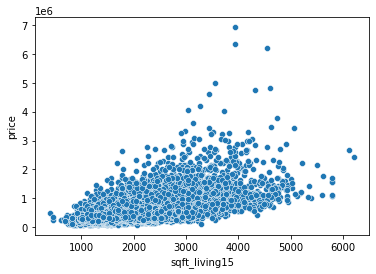

In [86]:
sns.scatterplot(df["sqft_living15"],df["price"])

## ***CONCLUSIONS:***

We concludes that ,price is highly correleted to 'bathrooms', 'sqft_living', 'sqft_above', and 'sqft_living15'.

And there is small correlation  between "price";  'bedrooms', 'floors' and 'sqft_basement'  respectively

In [89]:
df2=df1[['bedrooms','bathrooms', 'sqft_living', 'sqft_above','sqft_living15',"price"]]
df2

,bedrooms,bathrooms,sqft_living,sqft_above,sqft_living15,price
0,3.0,1.00,1180,1180,1340,199710.0
1,3.0,2.25,2570,2170,1690,484200.0
2,2.0,1.00,770,770,2720,162000.0
3,4.0,3.00,1960,1050,1360,543600.0
4,3.0,2.00,1680,1680,1800,459000.0
...,...,...,...,...,...,...
21608,3.0,2.50,1530,1530,1530,324000.0
21609,4.0,2.50,2310,2310,1830,360000.0
21610,2.0,0.75,1020,1020,1020,361890.9
21611,3.0,2.50,1600,1600,1410,360000.0


In [94]:
x=df2[['bedrooms','bathrooms','sqft_living','sqft_above','sqft_living15']]
y=df2["price"]

In [91]:
print(x)

       bathrooms  sqft_living  sqft_above  sqft_living15
0           1.00         1180        1180           1340
1           2.25         2570        2170           1690
2           1.00          770         770           2720
3           3.00         1960        1050           1360
4           2.00         1680        1680           1800
...          ...          ...         ...            ...
21608       2.50         1530        1530           1530
21609       2.50         2310        2310           1830
21610       0.75         1020        1020           1020
21611       2.50         1600        1600           1410
21612       0.75         1020        1020           1020

[21613 rows x 4 columns]


In [95]:
print(y)

0        199710.0
1        484200.0
2        162000.0
3        543600.0
4        459000.0
           ...   
21608    324000.0
21609    360000.0
21610    361890.9
21611    360000.0
21612    292500.0
Name: price, Length: 21613, dtype: float64


In [96]:
x=np.asanyarray(x)
y=np.asanyarray(y)

In [97]:
print(x)

[[3.00e+00 1.00e+00 1.18e+03 1.18e+03 1.34e+03]
 [3.00e+00 2.25e+00 2.57e+03 2.17e+03 1.69e+03]
 [2.00e+00 1.00e+00 7.70e+02 7.70e+02 2.72e+03]
 ...
 [2.00e+00 7.50e-01 1.02e+03 1.02e+03 1.02e+03]
 [3.00e+00 2.50e+00 1.60e+03 1.60e+03 1.41e+03]
 [2.00e+00 7.50e-01 1.02e+03 1.02e+03 1.02e+03]]


In [98]:
print(y)

[199710.  484200.  162000.  ... 361890.9 360000.  292500. ]


In [99]:
import sklearn
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [100]:
x_train

array([[2.00e+00, 1.00e+00, 7.10e+02, 7.10e+02, 1.81e+03],
       [3.00e+00, 1.50e+00, 9.70e+02, 9.70e+02, 1.04e+03],
       [3.00e+00, 2.00e+00, 1.34e+03, 6.70e+02, 1.52e+03],
       ...,
       [3.00e+00, 1.75e+00, 1.26e+03, 1.26e+03, 1.64e+03],
       [1.00e+00, 2.00e+00, 1.15e+03, 1.15e+03, 1.20e+03],
       [4.00e+00, 3.25e+00, 3.62e+03, 2.35e+03, 2.55e+03]])

In [101]:
y_train

array([ 337500.,  188550.,  301500., ...,  262350.,  204300., 1372500.])

In [102]:
y_train.shape

(17290,)

In [103]:
x_train.shape

(17290, 5)

In [104]:
y_test.shape

(4323,)

In [105]:
x_test.shape

(4323, 5)

In [106]:
x_train[0:6]

array([[2.00e+00, 1.00e+00, 7.10e+02, 7.10e+02, 1.81e+03],
       [3.00e+00, 1.50e+00, 9.70e+02, 9.70e+02, 1.04e+03],
       [3.00e+00, 2.00e+00, 1.34e+03, 6.70e+02, 1.52e+03],
       [3.00e+00, 1.00e+00, 1.25e+03, 1.25e+03, 1.35e+03],
       [3.00e+00, 1.75e+00, 1.80e+03, 9.00e+02, 1.80e+03],
       [4.00e+00, 3.25e+00, 3.02e+03, 1.92e+03, 2.40e+03]])

In [107]:
from sklearn import linear_model
clf=linear_model.LinearRegression()

In [108]:
print(clf)

LinearRegression()


In [109]:
clf.fit(x_train,y_train)

LinearRegression()

In [110]:
y_pred=clf.predict(x_test)

In [111]:
y_pred

array([ 445547.88119444,  158698.64269403,  426622.38313267, ...,
       1077571.96564892,  962939.56555516,  463305.92343293])